In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
session.query(Measurement.id, Station.id, Measurement.station, Station.station).limit(20).all()

[(1, 1, 'USC00519397', 'USC00519397'),
 (1, 2, 'USC00519397', 'USC00513117'),
 (1, 3, 'USC00519397', 'USC00514830'),
 (1, 4, 'USC00519397', 'USC00517948'),
 (1, 5, 'USC00519397', 'USC00518838'),
 (1, 6, 'USC00519397', 'USC00519523'),
 (1, 7, 'USC00519397', 'USC00519281'),
 (1, 8, 'USC00519397', 'USC00511918'),
 (1, 9, 'USC00519397', 'USC00516128'),
 (2, 1, 'USC00519397', 'USC00519397'),
 (2, 2, 'USC00519397', 'USC00513117'),
 (2, 3, 'USC00519397', 'USC00514830'),
 (2, 4, 'USC00519397', 'USC00517948'),
 (2, 5, 'USC00519397', 'USC00518838'),
 (2, 6, 'USC00519397', 'USC00519523'),
 (2, 7, 'USC00519397', 'USC00519281'),
 (2, 8, 'USC00519397', 'USC00511918'),
 (2, 9, 'USC00519397', 'USC00516128'),
 (3, 1, 'USC00519397', 'USC00519397'),
 (3, 2, 'USC00519397', 'USC00513117')]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [16]:
#investigate data - find earliest date
earliest_day = session.query(Measurement.date).order_by(Measurement.date).first()
earliest_day

('2010-01-01')

In [17]:
#investigate data - find most recent date
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_day

('2017-08-23')

In [18]:
past_year = pd.to_datetime(last_day) - dt.timedelta(days=365)
past_year

DatetimeIndex(['2016-08-23'], dtype='datetime64[ns]', freq=None)

In [19]:
one_year_ago = pd.to_datetime(past_year[0]).strftime('%Y-%m-%d')
one_year_ago

'2016-08-23'

In [20]:
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).order_by(Measurement.date).all()
precip

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [21]:
#Store data into dataframe
df = pd.DataFrame(precip, columns=['date', 'prcp'])
df.set_index(['date'], inplace=True)
df=df.dropna()
df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [22]:
df.index

Index(['2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23',
       '2016-08-23', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24',
       ...
       '2017-08-21', '2017-08-21', '2017-08-21', '2017-08-22', '2017-08-22',
       '2017-08-22', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23'],
      dtype='object', name='date', length=2021)

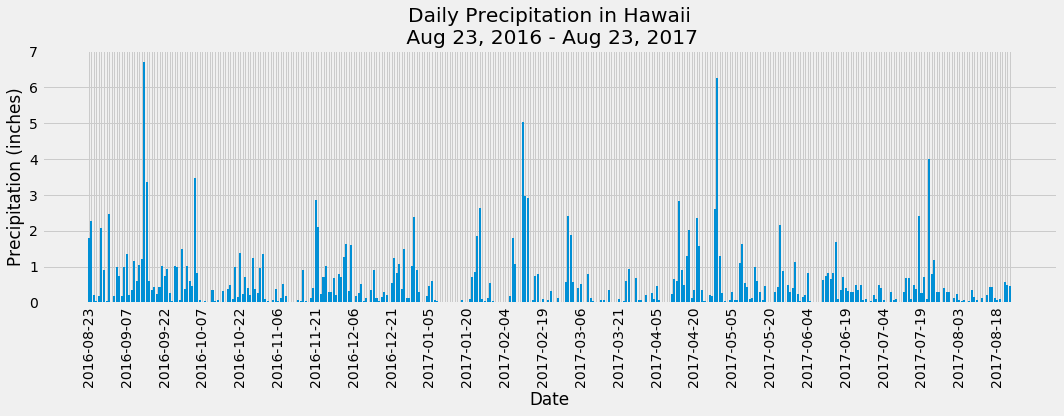

In [23]:
#Display daily precipitation values in bar chart
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(df.index.values, df['prcp'])

ax.set(xlabel="Date", ylabel="Precipitation (inches)", 
       title="Daily Precipitation in Hawaii\n Aug 23, 2016 - Aug 23, 2017")

#Reduce xtick label frequency
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%15 != 0:
        tick.label1.set_visible(False)

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("DailyPrcp.png")
plt.show()


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f"mode: {df.mode()}")
df.describe()

mode:    prcp
0   0.0


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [25]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Measurement.station), Measurement.station).\
            group_by(Measurement.station).count()

print(f"The number of weather stations is {station_count}.")

The number of weather stations is 9.


In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(func.count(Measurement.station), Measurement.station).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_activity

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id = [result[1] for result in station_activity[:1]]
print(f"The most active station is {station_id[0]}.")

station_min_temp = session.query(func.min(Measurement.tobs)).\
                    filter(Measurement.station == station_id[0]).all()
st_min_t = list(np.ravel(station_min_temp))
print(f"The minimum observed temperature at station {station_id[0]} was {st_min_t[0]}.")

station_max_temp = session.query(func.max(Measurement.tobs)).\
                    filter(Measurement.station == station_id[0]).all()
st_max_t = list(np.ravel(station_max_temp))
print(f"The maximum observed temperature at station {station_id[0]} was {st_max_t[0]}.")

station_avg_temp = session.query(func.avg(Measurement.tobs)).\
                    filter(Measurement.station == station_id[0]).all()
st_avg_t = list(np.ravel(station_avg_temp))
print(f"The average observed temperature at station {station_id[0]} was {round(st_avg_t[0], 2)}.")

The most active station is USC00519281.
The minimum observed temperature at station USC00519281 was 54.0.
The maximum observed temperature at station USC00519281 was 85.0.
The average observed temperature at station USC00519281 was 71.66.


In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == station_id[0]).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).statement
temperatures_df = pd.read_sql_query(temperatures, session.bind)
temperatures_df.set_index(['date'], inplace=True)
temperatures_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


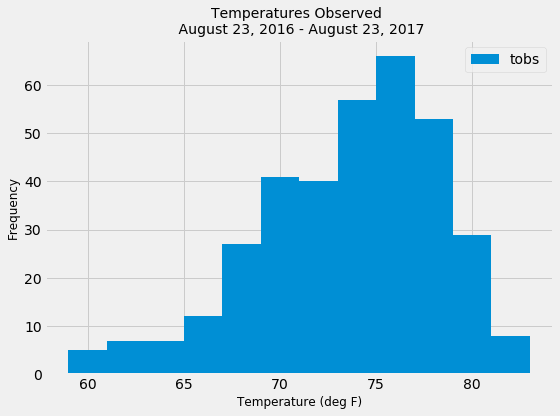

In [29]:
#Create a histogram plot of temperature observations
temperatures_df.plot.hist(bins=12, figsize=(8,6))
plt.title("Temperatures Observed \n August 23, 2016 - August 23, 2017", fontsize=14)
plt.xlabel("Temperature (deg F)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.savefig("temp_hist.png")
plt.show()

## Bonus Challenge Assignment

In [30]:
#read csv file
file_one = "Resources/hawaii_measurements.csv"
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_one_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [31]:
#Query Measurements database for all June tobs data
date_str_jun = '06'
Jun_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime('%m', Measurement.date) == date_str_jun).statement

Jun_temps_df = pd.read_sql_query(Jun_temps, session.bind)
Jun_temps_df.set_index(['date'], inplace=True)
Jun_temps_df.dropna(how='any')
Jun_temps_df

,tobs
date,
2010-06-01,78.0
2010-06-02,76.0
2010-06-03,78.0
2010-06-04,76.0
2010-06-05,77.0
...,...
2017-06-26,79.0
2017-06-27,74.0
2017-06-28,74.0


In [32]:
#Query Measurements database for all December tobs data

date_str_dec = '12'
Dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime('%m', Measurement.date) == date_str_dec).statement

Dec_temps_df = pd.read_sql_query(Dec_temps, session.bind)
Dec_temps_df.set_index(['date'], inplace=True)
Dec_temps_df.dropna(how='any')
Dec_temps_df

,tobs
date,
2010-12-01,76.0
2010-12-03,74.0
2010-12-04,74.0
2010-12-06,64.0
2010-12-07,64.0
...,...
2016-12-27,71.0
2016-12-28,71.0
2016-12-29,69.0


Null Hypothesis = the temperatures in Hawaii in January are the same as the temperatures in Hawaii
in June. \
Alternative hypothesis = the temperatures in Hawaii in January are different from the temperatures
in Hawaii in June. \
Method: Paired t-test - samples of Hawaii temperatures taken at different times represents one
population (Hawaii temperetures) at two times (January and June)

In [33]:
from scipy import stats

In [34]:
len(Jun_temps_df['tobs'])

1700

In [35]:
len(Dec_temps_df['tobs'])

1517

In [36]:
#Select sampling of data - sample size of 30
import random
a = random.sample(list(Jun_temps_df['tobs']), 30)
b = random.sample(list(Dec_temps_df['tobs']), 30)

In [37]:
#calculate t-test using scipy stats
t_test = stats.ttest_rel(a, b, axis=0, nan_policy='omit')
t_test

Ttest_relResult(statistic=6.358052387284687, pvalue=5.993475493600053e-07)

Results show that the average daily temperatures in Hawaii for December are stastically cooler by about 4.7 degrees F than in June.

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_date = '2018-03-01'
trip_end_date = '2018-03-08'
start_date = (pd.to_datetime(trip_start_date) - dt.timedelta(days=365)).strftime('%Y-%m-%d')
end_date = (pd.to_datetime(trip_end_date) - dt.timedelta(days=365)).strftime('%Y-%m-%d')

temp_stats = calc_temps(start_date, end_date)
temp_stats

[(62.0, 70.77083333333333, 78.0)]

In [40]:
temp_stats[0][1]

70.77083333333333

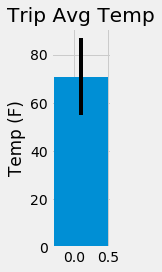

In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=(2,4))

x_pos = 0.1

avg_temp = temp_stats[0][1]
temp_rng = temp_stats[0][2] - temp_stats[0][0]

ax.bar(x_pos, avg_temp, yerr=temp_rng)

ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp (F)')

plt.tight_layout()
plt.savefig('AveTripTemp.png')
plt.show()

In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [43]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [44]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [45]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [46]:
# Plot the daily normals as an area plot with `stacked=False`
